# Imports

In [68]:
from datasets import load_dataset, load_from_disk
import seaborn as sns
import os
from huggingface_hub import notebook_login
from rich.pretty import pprint
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from tqdm.auto import tqdm
import pandas as pd
import numpy as np


print("Modlues imported sucessfully")

Modlues imported sucessfully


In [12]:
notebook_login() # some of us needed it for downloading the dataset

print("Login successful")

Login successful


# Analysis of the dataset
## Dataset features

*This data is embedded form the dataset's site: https://huggingface.co/datasets/louisbrulenaudet/clinical-trials*

### Core Study Information
- **nct_id:** Unique study identifier (NCT########)  
- **brief_title:** Concise study title  
- **official_title:** Complete formal study title  
- **study_type:** Study design type (Interventional, Observational, etc.)  
- **phases:** Clinical trial phases (Phase I, II, III, IV)  
- **overall_status:** Current study status  

### Study Design & Population
- **enrollment_count:** Target or actual enrollment number  
- **minimum_age / maximum_age:** Age eligibility bounds  
- **sex:** Gender eligibility (All, Male, Female)  
- **healthy_volunteers:** Whether healthy volunteers are accepted  
- **eligibility_criteria:** Detailed inclusion/exclusion criteria  
- **study_population:** Target population description  

### Clinical Context
- **conditions:** Medical conditions studied  
- **keywords:** Study-related keywords  
- **brief_summary:** Study purpose and rationale  
- **detailed_description:** Comprehensive study description  
- **primary_outcomes / secondary_outcomes:** Measured endpoints  

### Organizational Information
- **lead_sponsor:** Primary study sponsor  
- **collaborators:** Additional supporting organizations  
- **locations:** Study sites with geographic coordinates  
- **overall_officials:** Principal investigators and study officials  

### Temporal Data
- **study_first_submit_date:** Initial submission to ClinicalTrials.gov  
- **start_date:** Study start date  
- **primary_completion_date:** Primary endpoint completion date  
- **completion_date:** Overall study completion date  
- **last_update_submit_date:** Most recent data update date  

### Enhanced Features
- **brief_summary_embedding:** 768-dimensional semantic embedding of study summary  
- **eligibility_criteria_embedding:** 768-dimensional embedding of eligibility text  

## Load dataset

If dataset is present on your device, then load it from disk, otherwise, load it from internet and save it on disk

In [61]:
path_to_ds = "clinical-dataset" # your path to the dataset

print(f"Path is set to: \"{path_to_ds}\"")

Path is set to: "clinical-dataset"


In [64]:

if os.path.exists(path_to_ds):
    dataset = load_from_disk(path_to_ds)
else:
    dataset = load_dataset("louisbrulenaudet/clinical-trials", split="train")
    dataset.save_to_disk(path_to_ds)

train_data = dataset

print("Dataset loaded successfully")


Dataset loaded successfully


### Print dataset details

In [65]:
print(f"Dataset size: {len(train_data)}")
print("Features:")
pprint(train_data.features)

Dataset size: 541897
Features:


{
│   'nct_id': Value('string'),
│   'updated_at': Value('timestamp[us]'),
│   'brief_title': Value('string'),
│   'official_title': Value('string'),
│   'acronym': Value('string'),
│   'study_type': Value('string'),
│   'overall_status': Value('string'),
│   'study_first_submit_date': Value('timestamp[ms]'),
│   'start_date': Value('timestamp[ms]'),
│   'primary_completion_date': Value('timestamp[ms]'),
│   'completion_date': Value('timestamp[ms]'),
│   'phases': List(Value('string')),
│   'enrollment_count': Value('float64'),
│   'minimum_age': Value('float64'),
│   'maximum_age': Value('float64'),
│   'sex': Value('string'),
│   'healthy_volunteers': Value('bool'),
│   'brief_summary': Value('string'),
│   'detailed_description': Value('string'),
│   'eligibility_criteria': Value('string'),
│   'lead_sponsor_name': Value('string'),
│   'lead_sponsor_class': Value('string'),
│   'org_study_id_info': {'id': Value('string'), 'link': Value('string'), 'type': Value('string')},
│   'why_stopped': Value('string'),
│   'expanded_access_info': {
│   │   'hasExpandedAccess': Value('bool'),
│   │   'nctId': Value('string'),
│   │   'statusForNctId': Value('string')
│   },
│   'last_update_submit_qc_date': Value('timestamp[ms]'),
│   'last_update_post_date_struct': {'date': Value('string'), 'type': Value('string')},
│   'study_first_post_date_struct': {'date': Value('string'), 'type': Value('string')},
│   'std_ages': List(Value('string')),
│   'study_population': Value('string'),
│   'sampling_method': Value('string'),
│   'oversight_has_dmc': Value('bool'),
│   'design_info': {
│   │   'allocation': Value('string'),
│   │   'interventionModel': Value('string'),
│   │   'interventionModelDescription': Value('string'),
│   │   'maskingInfo': {
│   │   │   'masking': Value('string'),
│   │   │   'maskingDescription': Value('string'),
│   │   │   'whoMasked': List(Value('string'))
│   │   },
│   │   'observationalModel': Value('string'),
│   │   'primaryPurpose': Value('string'),
│   │   'timePerspective': Value('string')
│   },
│   'conditions': List(Value('string')),
│   'keywords': Value('string'),
│   'interventions': Value('null'),
│   'locations': List({'city': Value('string'), 'country': Value('string'), 'facility': Value('string'), 'geoPoint': {'lat': Value('float64'), 'lon': Value('float64')}, 'state': Value('string')}),
│   'collaborators': List({'class': Value('string'), 'name': Value('string')}),
│   'arm_groups': Value('null'),
│   'outcomes': {
│   │   'other': List({'description': Value('null'), 'measure': Value('string'), 'timeFrame': Value('string')}),
│   │   'primary': List({'description': Value('null'), 'measure': Value('string'), 'timeFrame': Value('string')}),
│   │   'secondary': List({'description': Value('null'), 'measure': Value('string'), 'timeFrame': Value('string')})
│   },
│   'overall_officials': List({'affiliation': Value('string'), 'name': Value('string'), 'role': Value('string')}),
│   'study_references': Value('string'),
│   'misc_info_module': Value('string'),
│   'condition_browse_module': {
│   │   'ancestors': List({'id': Value('string'), 'term': Value('string')}),
│   │   'browseBranches': List({'abbrev': Value('string'), 'name': Value('string')}),
│   │   'browseLeaves': List({'asFound': Value('string'), 'id': Value('string'), 'name': Value('string'), 'relevance': Value('string')}),
│   │   'meshes': List({'id': Value('string'), 'term': Value('string')})
│   },
│   'intervention_browse_module': {
│   │   'ancestors': List({'id': Value('string'), 'term': Value('string')}),
│   │   'browseBranches': List({'abbrev': Value('string'), 'name': Value('string')}),
│   │   'browseLeaves': List({'asFound': Value('string'), 'id': Value('string'), 'name': Value('string'), 'relevance': Value('string')}),
│   │   'meshes': List({'id': Value('string'), 'term': Value('string')})
│   },
│   'mesh_terms': {
│   │   'conditions': List({'id': Value('string'), 'term': Value('string')}),
│   │   'interventions': List({

### Example of data

In [52]:
sample = train_data.select(range(10)).to_pandas()

sample

# Projection only to relevant fileds
# sample["nct_id"] # Ids
# sample[["brief_title", "brief_summary", "detailed_description", "eligibility_criteria", "keywords"]] # Free text 
# sample[["mesh_terms", "condition_browse_module", "intervention_browse_module"]] # Structured text
# sample[["conditions", "interventions"]] # Validation data

,nct_id,updated_at,brief_title,official_title,acronym,study_type,overall_status,study_first_submit_date,start_date,primary_completion_date,...,locations,collaborators,arm_groups,outcomes,overall_officials,study_references,misc_info_module,condition_browse_module,intervention_browse_module,mesh_terms
0,NCT01273766,NaT,Deferasirox in Treating Iron Overload Caused B...,Impact of Intervention With Deferasirox on the...,None,INTERVENTIONAL,COMPLETED,2011-01-07,NaT,NaT,...,"[{'city': 'Winston-Salem', 'country': 'United ...","[{'class': 'NIH', 'name': 'National Cancer Ins...",None,"{'other': None, 'primary': [{'description': No...",[{'affiliation': 'Wake Forest University Healt...,None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': [{'id': 'D004194', 'term': 'Dise...","{'ancestors': [{'id': 'D007502', 'term': 'Iron...","{'conditions': [{'id': 'D002051', 'term': 'Bur..."
1,NCT00787566,NaT,"Phase 2 Study of Efficacy, Tolerability, and S...","A Randomized, Single Administration, Double-bl...",None,INTERVENTIONAL,COMPLETED,2008-11-05,NaT,NaT,...,[{'city': 'The study is managed by Kendle Inte...,None,None,"{'other': None, 'primary': [{'description': No...",None,None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': [{'id': 'D012817', 'term': 'Sign...","{'ancestors': [{'id': 'D000932', 'term': 'Anti...","{'conditions': [{'id': 'D009325', 'term': 'Nau..."
2,NCT00497666,NaT,Association Between Rosiglitazone Use and Clin...,Retrospective Study Evaluating the Association...,None,OBSERVATIONAL,UNKNOWN,2007-07-06,NaT,NaT,...,"[{'city': 'Zerifin,', 'country': 'Israel', 'fa...",None,None,None,"[{'affiliation': 'Nephrology Division, Assaf H...",None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': [{'id': 'D014570', 'term': 'Urol...","{'ancestors': None, 'browseBranches': [{'abbre...","{'conditions': [{'id': 'D007674', 'term': 'Kid..."
3,NCT01978366,NaT,Open Label Extension Study of HT-100 in Patien...,An Open Label Extension Study of HT-100 in Pat...,None,INTERVENTIONAL,TERMINATED,2013-10-31,NaT,2016-04-30,...,"[{'city': 'Sacramento', 'country': 'United Sta...",None,None,"{'other': None, 'primary': [{'description': No...","[{'affiliation': 'AkashiTherapeutics', 'name':...",None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': [{'id': 'D020966', 'term': 'Musc...","{'ancestors': [{'id': 'D000970', 'term': 'Anti...","{'conditions': [{'id': 'D009136', 'term': 'Mus..."
4,NCT01971866,NaT,Camera Based System to Monitor Patient Movemen...,Improving Safety and Accuracy of Proton Therap...,DS02,OBSERVATIONAL,TERMINATED,2013-10-17,NaT,NaT,...,"[{'city': 'Jacksonville', 'country': 'United S...",None,None,"{'other': None, 'primary': [{'description': No...",[{'affiliation': 'University of Florida Proton...,None,"{""versionHolder"": ""2025-06-18""}",None,None,None
5,NCT04912466,NaT,IBI322 Monotherapy or Combination Therapy in S...,"A Phase 1a/1b Study Evaluating the Safety, Tol...",None,INTERVENTIONAL,COMPLETED,2021-05-28,NaT,2022-12-03,...,"[{'city': 'Jinan', 'country': 'China', 'facili...",None,None,"{'other': None, 'primary': [{'description': No...","[{'affiliation': 'No.440, Jiyan Road, Jinang C...",None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': None, 'browseBranches': None, 'b...","{'ancestors': None, 'browseBranches': [{'abbre...","{'conditions': [{'id': 'D009369', 'term': 'Neo..."
6,NCT03409666,NaT,Randomized Controlled RSA Study Comparing the ...,Randomized Controlled Study Comparing the Tape...,None,INTERVENTIONAL,COMPLETED,2018-01-08,NaT,2020-11-06,...,"[{'city': 'Roosendaal', 'country': 'Netherland...",None,None,"{'other': None, 'primary': [{'description': No...","[{'affiliation': 'Zimmer Biomet', 'name': 'Pao...",None,"{""versionHolder"": ""2025-06-18""}","{'ancestors': [{'id': 'D001168', 'term': 'Arth...",None,"{'conditions': [{'id': 'D010003', 'term': 'Ost..."
7,NCT00622466,NaT,Sorafenib and Paclitaxel in Treating Patients ...,Phase II Trial of Sorafenib and Paclitaxel for...,None,INTERVENTIONAL,TERMINATED,2008-02-22,NaT

### Project and dataset

The Group has decided to move forward with Peter's 1st proposed idea, which is *Forecasting emerging research areas*, in order to be able carry out the task successfully, we need to check if the data is enough to continue with this project. So we check for missingness of features.

In [50]:
import pyarrow as pa
import pyarrow.compute as pc
from datasets import Dataset

date_columns = {
    "study_first_submit_date",
    "start_date",
    "primary_completion_date",
    "completion_date",
}

summary = []
table = train_data.data  # underlying pyarrow.Table
total = train_data.num_rows

def to_timestamp_ns(chunked): # using some ways to cast it to unified measure
    # If already timestamp, return
    if pa.types.is_timestamp(chunked.type) and chunked.type.unit == "ns":
        return chunked
    
    # If timestamp but different unit -> casting to correct
    if pa.types.is_timestamp(chunked.type):
        return pc.cast(chunked, pa.timestamp("ns"))
    
    # If date32/date64 -> cast up to timestamp
    if pa.types.is_date32(chunked.type) or pa.types.is_date64(chunked.type):
        return pc.cast(pc.cast(chunked, pa.timestamp("ns")), pa.timestamp("ns"))
    
    # If string/large_string -> parse
    if pa.types.is_string(chunked.type) or pa.types.is_large_string(chunked.type):
        ts = pc.strptime(chunked, format="%Y-%m-%d", unit="ns", error_is_null=True) # Adjust format(s) if your data varies; this example assumes YYYY-MM-DD
        return ts
    
    # Otherwise: not a date-like type
    return None

for name in train_data.column_names:
    col = table[name]  # pyarrow.ChunkedArray

    miss = col.null_count
    non_miss = total - miss
    missing_pct = (miss / total * 100) if total else None

    min_date = None
    max_date = None

    if name in date_columns:
        ts = to_timestamp_ns(col)
        if ts is not None:
            valid = pc.drop_null(ts)
            if valid.length() > 0:
                # Arrow min/max run in C++ and are very fast
                min_date = pc.min(valid).as_py()
                max_date = pc.max(valid).as_py()

    summary.append({
        "column": name,
        "total_rows": total,
        "missing": miss,
        "missing_%": None if missing_pct is None else round(missing_pct, 2),
        "non_missing": non_miss,
        "min_date": min_date,
        "max_date": max_date,
    })

missing_summary = Dataset.from_list(summary).sort("missing_%", reverse=True)

missing_summary = missing_summary.to_pandas()

print("\nTop 20 columns by missing percentage:")
missing_summary.head(20)


Top 20 columns by missing percentage:


,column,total_rows,missing,missing_%,non_missing,min_date,max_date
0,updated_at,541897,541897,100.00,0,NaT,NaT
1,start_date,541897,541897,100.00,0,NaT,NaT
2,interventions,541897,541897,100.00,0,NaT,NaT
3,arm_groups,541897,541897,100.00,0,NaT,NaT
4,study_population,541897,420133,77.53,121764,NaT,NaT
5,sampling_method,541897,420118,77.53,121779,NaT,NaT
6,collaborators,541897,367593,67.83,174304,NaT,NaT
7,study_references,541897,363526,67.08,178371,NaT,NaT
8,intervention_browse_module,541897,266172,49.12,275725,NaT,NaT
9,maximum_age,541897,254447,46.95,287450,NaT,NaT


C:\Users\korni\AppData\Local\Temp\ipykernel_13304\846007154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_summary, x="missing_%", y="column", palette="viridis")


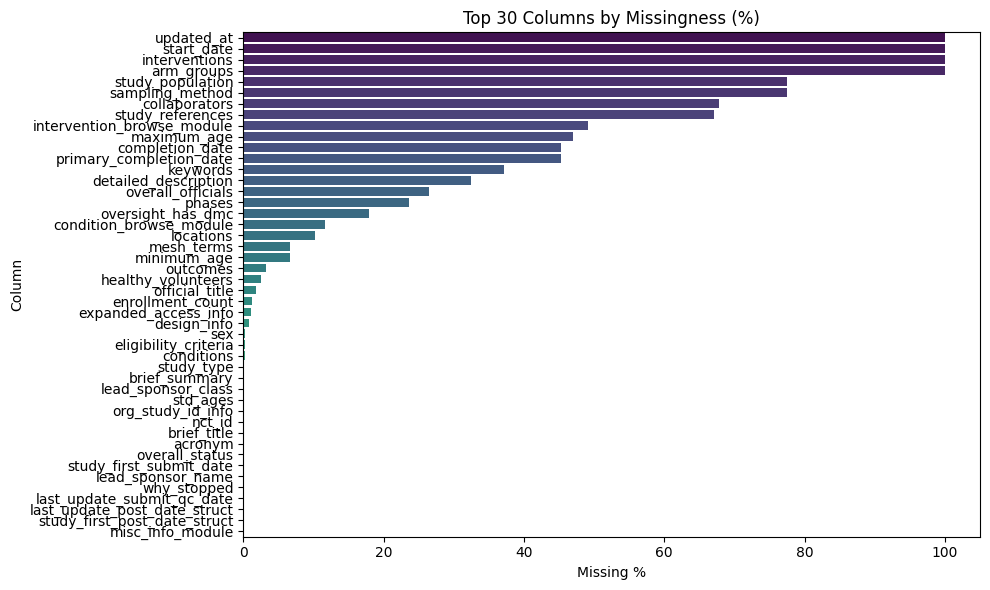

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=missing_summary, x="missing_%", y="column", palette="viridis")
plt.title("Top 30 Columns by Missingness (%)")
plt.xlabel("Missing %")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

#### Conclusion

This clearly shows that this project (1st idea) is not a good project on this dataset as the temporal data is highly missing form the dataset. What data is necesseary for the other idea proposed by the team member is however good according to what we can see on this plot. So the team moves forward with the second idea which is the *Anchored Topic Modeling for Interpretable Clinical Trial Landscapes* also made by him.

## Features used for training

As the team decided on the dataset and project, now we filter the features present in the dataset only to the relevant ones for exploration. These are the following.

According to desctiption of the project we will use the following features from the dataset to carry out the task, the fetaures can be groupped into 4 parts, which are the following:

#### Identification:

- `nct_id`

#### Free text:
 - `brief_title`
 - `brief_summary`
 - `detailed_description`
 - `eligibility_criteria`
 - `keywords`

#### Structured text data:
 - `mesh_terms`
 - `condition_browse_module`
 - `intervention_browse_module`

#### Validation data for extracted topics:
 - `conditions`
 - `interventions`

 These features contain useful information related to medical text and context. The **"Free text"** and **"Structured text"** groups will give the backbone of the project's training data, and we can validate the topics using the features in the **"Validation data ..."** group.

In [17]:
FREE_TEXT_COLS = [
    "brief_title",
    "brief_summary",
    "detailed_description",
    "eligibility_criteria",
    "keywords",
]

STRUCTURED_TEXT_COLS = [
    "mesh_terms",
    "condition_browse_module",
    "intervention_browse_module",
]

VALIDATION_COL = ["conditions", "interventions"]

#### Research count

Let's see how many unique researches is the team dealing with

In [66]:
unique_ids = train_data.unique("nct_id")

len(unique_ids)

541897

### Handling the data in batches

As the chosen dataset is remarkable in size, we choose to process it in batches to avoid problems realted to RAM.

In [19]:
def iterate_batches(ds, batch_size=2000):
    batch = []
    for row in ds:
        batch.append(row)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

#### Free text analysation

Map (num_proc=4):   0%|          | 0/541897 [00:00<?, ? examples/s]

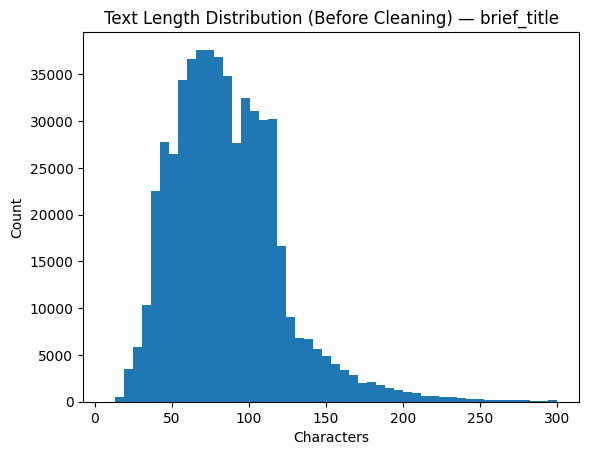

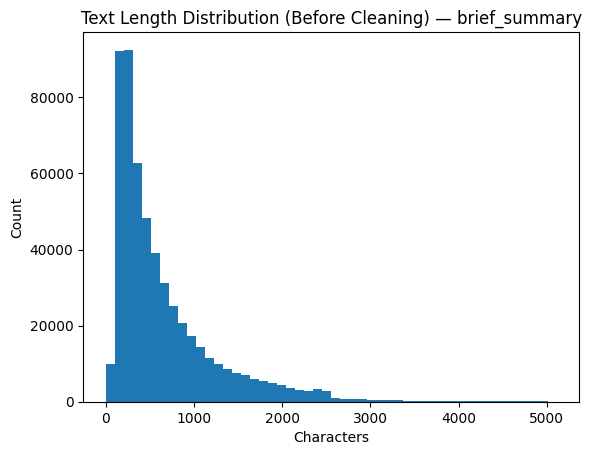

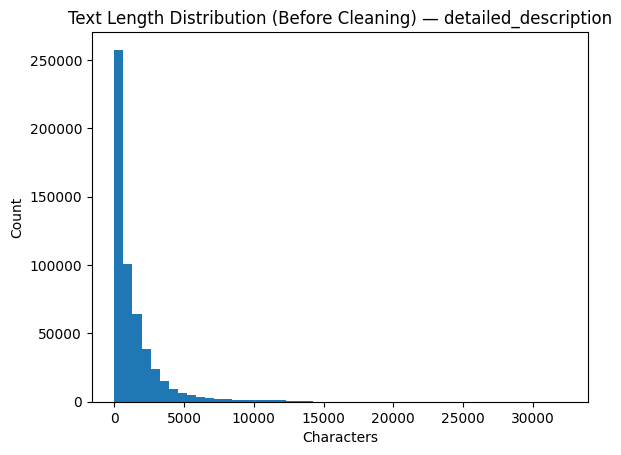

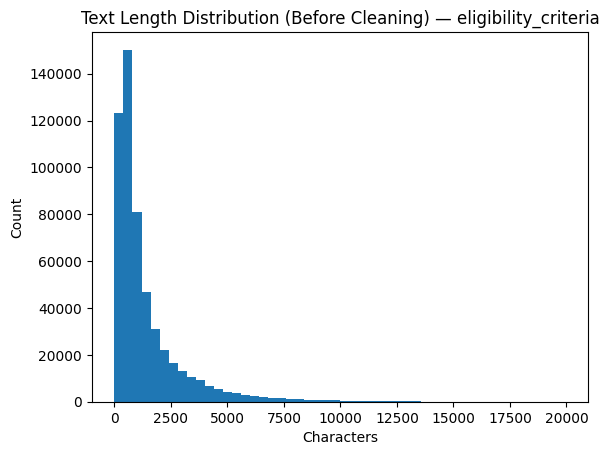

In [ ]:
def length_dist_plot(state):
    text_cols = ["brief_title", "brief_summary", "detailed_description", "eligibility_criteria"]
    
    def add_length(example):
        for col in text_cols:
            example[col + "_length"] = len(example[col]) if example[col] is not None else 0
        return example

    ds_len = train_data.map(add_length, num_proc=4)

    for col in text_cols:
        plt.figure()
        plt.hist(ds_len[col + "_length"], bins=50)
        plt.title(f"Text Length Distribution ({state}) — {col}")
        plt.xlabel("Characters")
        plt.ylabel("Count")
        plt.show()

length_dist_plot("before cleaning")

In [73]:
def fast_tokenize(text):
    if not text or not isinstance(text, str):
        return []
    return text.lower().split()

def process_keywords(batch):
    kws = []
    counts = []
    for entry in batch["keywords"]:
        if entry and isinstance(entry, str):
            tokens = [k.strip().lower() for k in entry.split(",") if k.strip()]
        else:
            tokens = []
        kws.append(tokens)
        counts.append(len(tokens))
    return {"keywords_list": kws, "num_keywords": counts}

dataset = train_data.map(process_keywords, batched=True)

# Total keyword frequency
keyword_counter = Counter()
for kws in dataset["keywords_list"]:
    keyword_counter.update(kws)

top_keywords = keyword_counter.most_common(30)  # Top 30 keywords


text_fields = ["brief_summary", "detailed_description"]

def compute_lengths(batch):
    lengths = {f"{field}_word_count": [] for field in text_fields}
    for field in text_fields:
        for record in batch[field]:
            lengths[f"{field}_word_count"].append(len(fast_tokenize(record)))
    return lengths

dataset = dataset.map(compute_lengths, batched=True)

# Convert to numpy arrays for correlation
x = np.array(dataset["brief_summary_word_count"])
y = np.array(dataset["detailed_description_word_count"])

correlation = np.corrcoef(x, y)[0, 1]  # Pearson correlation

vocab_counter = Counter()

for field in ["brief_title", "brief_summary", "detailed_description", "eligibility_criteria"]:
    for text in dataset[field]:
        vocab_counter.update(fast_tokenize(text))

vocab_size = len(vocab_counter)
top_tokens = vocab_counter.most_common(50)  # Top 50 words


print("\n--- (3) Keyword Stats ---")
print(f"Average keywords per record: {np.mean(dataset['num_keywords']):.2f}")
print("Top 10 keywords:")
# for kw, c in keyword_counter.most_common(10):
#     print(f"{kw}: {c}")

print("\n--- (4) Cross-field length correlation ---")
print(f"Correlation between brief_summary and detailed_description word counts: {correlation:.4f}")

print("\n--- (6) Vocabulary Stats ---")
print(f"Vocabulary size: {vocab_size}")
print("Top 20 tokens:")
for tok, c in top_tokens[:20]:
    print(f"{tok}: {c}")


Map:   0%|          | 0/541897 [00:00<?, ? examples/s]

Map:   0%|          | 0/541897 [00:00<?, ? examples/s]

KeyboardInterrupt: 

#### Explanation

As we can see it from the plots, there is remarkable difference between each feature throughout the dataset. This yields in the following conclusion. The longer the text the longer it can contain stopwords which should be removed. The longer the text the longer it can contain words that appear in different forms. The conclusion is that with tokenization the texts should be a bit more normalized, besides the fact that we need to tokenize the free text anyway to be able to feed it to any model.

#### Tokenization steps:
 - stopword removal
 - lowercasing
 - lemmatization (this might change later to domain specific lemmatization (like for medical field))
 - column filtering (keep only relevant columns)
 - row filtering (delete rows that does not meet certain criterias)
 - unified format (only plain text, no html or other modifiers)